# Serial Correlation
First, read this [Wikipedia article](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) about the Durbin-Watson statistic (just read the intro and the first section after the intro).
## Now, let's take a look at this statistic in various contexts.
### First, code up your own Durbin-Watson statistic.

In [17]:
from statsmodels.stats.stattools import durbin_watson 
import statsmodels as sm

### Now, create data that represents a linear model with noise, then fit a line to it, and see what your Durbin-Watson statistic gives for this model.
Also, plot the data and the line.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

In [19]:
def myDurbinWatson(residuals):
    d = 0.0
    for i in range(len(residuals)-1): # We do -1 since we want the residual between a point and its previous point
        d += (residuals[i] - residuals[i+1])**2
    divisor = sum([x**2 for x in residuals])
    d /= divisor
    return d

In [20]:
x = np.linspace(0,10)
y = 2.0 * x + np.random.normal(loc=0.0,scale=0.1,size=len(x))

In [21]:
x = x.reshape(-1,1)

In [22]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
yHat = lr.predict(x)

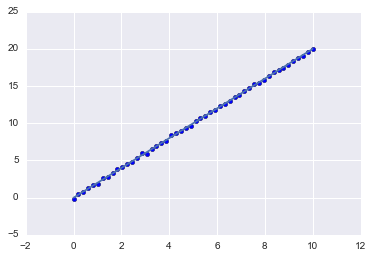

In [24]:
plt.scatter(x,y)
plt.plot(x,yHat)

In [25]:
residuals = yHat - y
d = myDurbinWatson(residuals)
d

2.4721613899732029

In [26]:
myDurbinWatson(y)

0.0014345379074582932

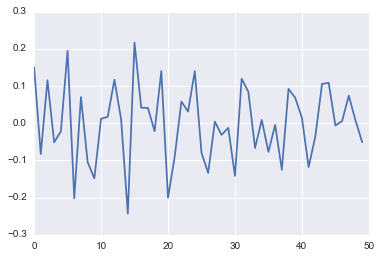

In [28]:
plt.plot(residuals)

ValueError: x and y must be the same size

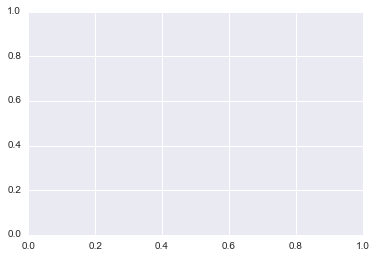

In [27]:
y = x*x + np.random.normal(loc=0.0,scale=0.1,size=len(x))

lr = LinearRegression()
lr.fit(x,y)

yHat = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,yHat)

### Now, create data that represents a quadratic model with noise, but still fit a *line* to it, and see what your Durbin-Watson statistic gives for this model.
Also, plot the data and the line.

### Reflect
What does your Durbin-Watson statistic tell you about the serial correlation of the residuals in the above models?  Is this to your expectation?

When you have a pattern amongst the residuals, what does that tell you about your model?